In [2]:
import pandas as pd
import os, sys
import matplotlib.pyplot as plt

# add path
if '../..' in sys.path:
    pass
else:
    sys.path.insert(0, '../..')

from loader.greenhouse_loader import GreenhouseLoader
from loader.construction_industry import ConstructionLoader

def load_co2_data():
    ghg_loader = GreenhouseLoader()
    cur_dir = os.getcwd()
    os.chdir('../../')
    ghg_loader.load()
    df_ghg = ghg_loader.get_data()
    os.chdir(cur_dir)
    return df_ghg

def load_construction_industry():
    construction_loader = ConstructionLoader()
    cur_dir = os.getcwd()
    os.chdir('../../')
    construction_loader.load()
    df_construction = construction_loader.get_data()
    os.chdir(cur_dir)
    return df_construction

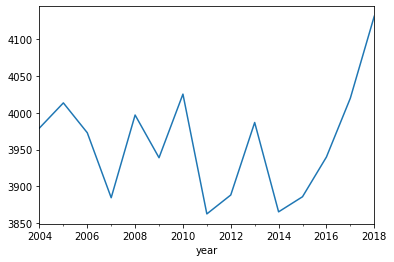

year
2014-01-01    3865.200000
2015-01-01    3885.740000
2016-01-01    3939.780000
2017-01-01    4019.850000
2018-01-01    4131.339045
dtype: float64

In [3]:
# Global
gg_data = load_co2_data()
co2_df = gg_data['co2_country_sector']['Buildings']
co2_df.index = pd.to_datetime(co2_df.index)

co2_df = co2_df.loc['2004':, :]
co2_sum = co2_df.sum(axis=1)
#co2_sum = co2_sum.drop(['year'])
co2_sum.columns = ['CO2 Construction Sector']
co2_sum.plot()
plt.show()
co2_sum.iloc[-5:]

In [6]:
# Calculate Emission share of building sector 2018
gg_data = load_co2_data()


co2_df = gg_data['co2_country_sector']['Buildings']
co2_df.index = pd.to_datetime(co2_df.index)

co2_df = co2_df.loc['2004':, :]

country_list = ['EU', 'United States', 'India', 'China', 'Japan', 'Russia', 'Canada', 'Brazil']
country_shares = [co2_df[country][-1]/gg_data["co2_country"][country]["2018"] for country in country_list]


for (country, share) in enumerate(zip(country_list, country_shares)):
    print(country, share)

print("Country shares:",zip(country_list, country_shares))

co2_sum = co2_df.sum(axis=1)
#co2_sum = co2_sum.drop(['year'])
co2_sum.columns = ['CO2 Construction Sector']
print("Share:",co2_sum.iloc[-1:]/gg_data["co2_country"]["GLOBAL TOTAL"]["2018"])

0 ('EU', 0.26632878721315184)
1 ('United States', 0.34537604360486635)
2 ('India', 0.11033702829877179)
3 ('China', 0.0836765205118288)
4 ('Japan', 0.16455194943951806)
5 ('Russia', 0.1401568902415634)
6 ('Canada', 0.29610887817528775)
7 ('Brazil', 0.4049228423931456)
Country shares: <zip object at 0x000001EAEB7BD988>
Share: year
2018-01-01    0.239293
dtype: float64


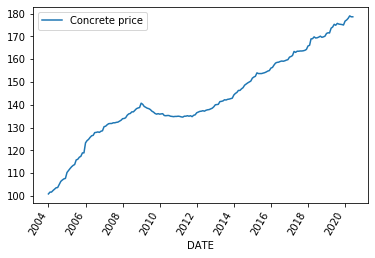

            Concrete price
DATE                      
2020-01-01        1.000000
2020-02-01        1.002830
2020-03-01        1.006791
2020-04-01        1.013016
2020-05-01        1.010753
2020-06-01        1.010753


In [27]:
# Concrete Price
df_const = load_construction_industry()
df_concrete = df_const['concrete_price']
df_concrete.index = pd.to_datetime(df_concrete['DATE'])
df_concrete = df_concrete.loc['2004':,:]
df_concrete = df_concrete.drop(['DATE'], axis=1)
df_concrete.columns = ['Concrete price']
ax = df_concrete.plot(x_compat=True)
plt.xticks(rotation=60)
plt.show()
df_concrete.iloc[-5:]

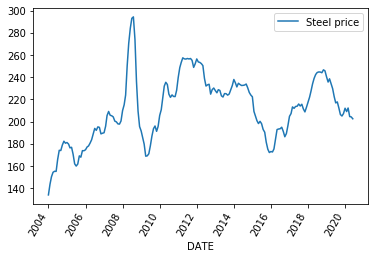

            Steel price
DATE                   
2020-01-01     1.000000
2020-02-01     0.985856
2020-03-01     1.000943
2020-04-01     0.964639
2020-05-01     0.963225
2020-06-01     0.955210


In [25]:
df_const = load_construction_industry()
df_steel = df_const['steel_iron_price']
df_steel.index = pd.to_datetime(df_steel['DATE'])
df_steel = df_steel.loc['2004':,:]
df_steel = df_steel.drop(['DATE'], axis=1)
df_steel.columns = ['Steel price']
ax = df_steel.plot(x_compat=True)
plt.xticks(rotation=60)
plt.show()
df_steel.iloc[-5:]

In [83]:
# Indicators:

# Format to 2020 indicator
steel_indicator = df_steel.iloc[:]/df_steel.iloc[-6]
print(np.shape(steel_indicator))
# Format to 2020 indicator
concrete_indicator = df_concrete.iloc[:]/df_concrete.iloc[-6]
print(concrete_indicator)

#Stack indicators:
df = pd.DataFrame(steel_indicator) 
df['Concrete price']=concrete_indicator
# print("Index format:", df.index.year)
df=df.groupby(df.index.year).transform('mean')
nov_mask = df.index.map(lambda x: x.month) == 1
df=df[nov_mask]
print(df)

(198, 1)
            Concrete price
DATE                      
2004-01-01        0.571024
2004-02-01        0.575552
2004-03-01        0.575552
2004-04-01        0.579513
2004-05-01        0.582909
...                    ...
2020-02-01        1.002830
2020-03-01        1.006791
2020-04-01        1.013016
2020-05-01        1.010753
2020-06-01        1.010753

[198 rows x 1 columns]
            Steel price  Concrete price
DATE                                   
2004-01-01     0.765716        0.589794
2005-01-01     0.806891        0.649689
2006-01-01     0.879420        0.716752
2007-01-01     0.947941        0.746274
2008-01-01     1.161795        0.771977
2009-01-01     0.867515        0.780985
2010-01-01     1.053905        0.765705
2011-01-01     1.193934        0.764195
2012-01-01     1.134881        0.778768
2013-01-01     1.067539        0.801594
2014-01-01     1.094334        0.834512
2015-01-01     0.922089        0.869506
2016-01-01     0.881542        0.896765
2017-01-01     0

In [101]:
# Target:

co2_df = gg_data['co2_country_sector']['Buildings']
co2_df.index = pd.to_datetime(co2_df.index)

co2_df = co2_df.loc['2004':, :]
eu_gg = co2_df.EU

print(eu_gg)

year
2004-01-01     749.34
2005-01-01     752.07
2006-01-01     741.06
2007-01-01     657.24
2008-01-01     705.88
2009-01-01     679.98
2010-01-01     722.86
2011-01-01     628.19
2012-01-01     648.74
2013-01-01     656.73
2014-01-01     566.88
2015-01-01      589.6
2016-01-01      605.8
2017-01-01     619.64
2018-01-01    610.863
Name: EU, dtype: object


Index(['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Anguilla',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba', 'Australia',
       ...
       'Uruguay', 'Uzbekistan', 'Vanuatu', 'Venezuela', 'Vietnam',
       'Western Sahara', 'Yemen', 'Zambia', 'Zimbabwe', 'EU'],
      dtype='object', name='country_name', length=207)
-1.2448521594828965


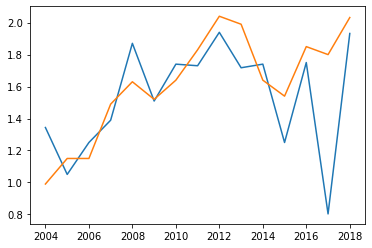

In [127]:
import numpy as np

from sklearn import svm

features=df[:-2]
print(co2_df.keys())
target=co2_df.Armenia

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.33, random_state=42)

regr = svm.SVR(kernel='rbf', C=1000)
regr.fit(X_train, y_train)
pred = regr.predict(features)

plt.plot(target.index, pred, label="Prediction")
plt.plot(target.index, target, label="EU")

print(regr.score(X_test,y_test))

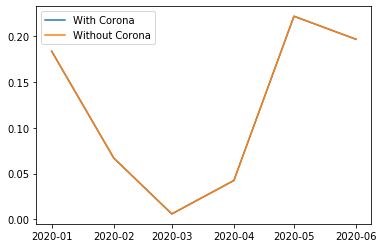

In [35]:
import datetime
from dateutil.relativedelta import *




indicator_percentages = np.random.rand(6)
forecast = np.random.rand(6)

#Plotting
base = datetime.datetime(2020, 1, 1)
months = np.array([base + relativedelta(months=+i) for i in range(6)]) # sixmonths

plt.plot(months, indicator_percentages*forecast, label='With Corona')
plt.plot(months, indicator_percentages*forecast, label='Without Corona')
plt.legend()
plt.show()

# Steel price
# Global Employment data only until 2018 => discarded